In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
from datetime import datetime,time


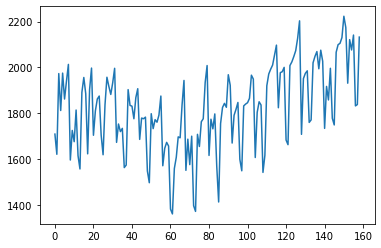

In [2]:
#from sm.tsa.statespace import sa
Amtrak = pd.read_csv("Amtrak (1).csv")
Amtrak.rename(columns={"Ridership ('000)":"Ridership"},inplace=True)
Amtrak.Ridership.plot() # time series plot 
# Creating a Date column to store the actual Date format for the given Month column
Amtrak["Date"] = pd.to_datetime(Amtrak.Month,format="%b-%y") 

In [3]:
Amtrak["month"] = Amtrak.Date.dt.strftime("%b") # month extraction
#Amtrak["Day"] = Amtrak.Date.dt.strftime("%d") # Day extraction
#Amtrak["wkday"] = Amtrak.Date.dt.strftime("%A") # weekday extraction
Amtrak["year"] = Amtrak.Date.dt.strftime("%Y")  

In [4]:
Amtrak 

,Month,Ridership,Date,month,year
0,Jan-91,1709,1991-01-01,Jan,1991
1,Feb-91,1621,1991-02-01,Feb,1991
2,Mar-91,1973,1991-03-01,Mar,1991
3,Apr-91,1812,1991-04-01,Apr,1991
4,May-91,1975,1991-05-01,May,1991
...,...,...,...,...,...
154,Nov-20,2076,2020-11-01,Nov,2020
155,Dec-20,2141,2020-12-01,Dec,2020
156,Jan-20,1832,2020-01-01,Jan,2020
157,Feb-20,1838,2020-02-01,Feb,2020


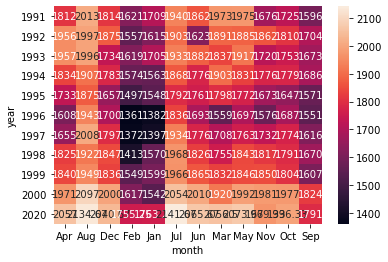

In [5]:
heatmap_y_month = pd.pivot_table(data=Amtrak,values="Ridership",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

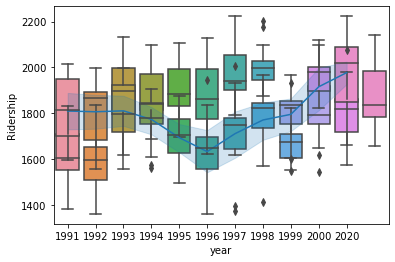

In [6]:
sns.boxplot(x="month",y="Ridership",data=Amtrak)
sns.boxplot(x="year",y="Ridership",data=Amtrak)
# sns.factorplot("month","Ridership",data=Amtrak,kind="box")

# Line plot for Ridership based on year
sns.lineplot(x="year",y="Ridership",data=Amtrak) 

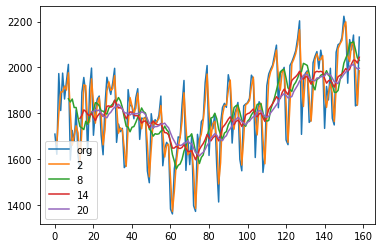

In [7]:
Amtrak.Ridership.plot(label="org")
for i in range(2,24,6):
    Amtrak["Ridership"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3) 

<ipython-input-8-bcb74875d967>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(Amtrak.Ridership,model="additive",freq=12)
<ipython-input-8-bcb74875d967>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_mul = seasonal_decompose(Amtrak.Ridership,model="multiplicative",freq=12)


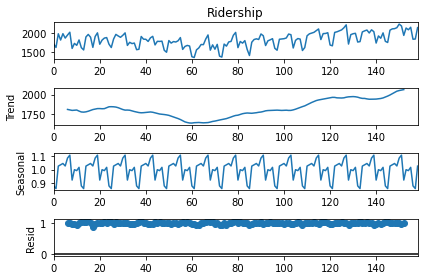

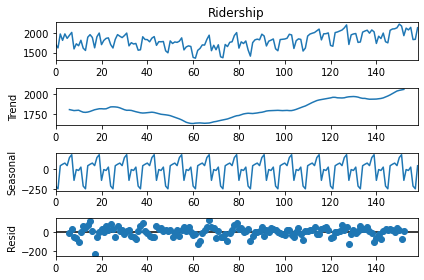

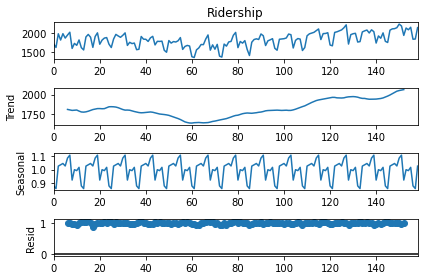

In [8]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(Amtrak.Ridership,model="additive",freq=12)
decompose_ts_add.plot()
decompose_ts_mul = seasonal_decompose(Amtrak.Ridership,model="multiplicative",freq=12)
decompose_ts_mul.plot() 

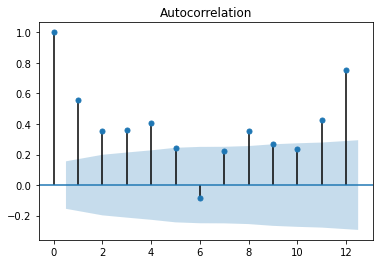

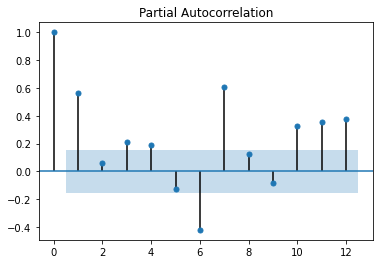

In [9]:
# ACF plots and PACF plots on Original data sets 
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Amtrak.Ridership,lags=12)
tsa_plots.plot_pacf(Amtrak.Ridership,lags=12)

# Amtrak.index.freq = "MS" 
# splitting the data into Train and Test data and considering the last 12 months data as 
# Test data and left over data as train data 

Train = Amtrak.head(147)
Test = Amtrak.tail(12)
# to change the index value in panda 

In [10]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)
Train["Ridership"] = Train["Ridership"].astype('double')

<ipython-input-10-93e506a3682c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Ridership"] = Train["Ridership"].astype('double')


In [11]:
ses_model = SimpleExpSmoothing(Train["Ridership"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Ridership) # 7.846321 

8.284196384776466

In [12]:
# Holt method 
hw_model = Holt(Train["Ridership"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Ridership) # 7.261176729658341 

7.981197961814831

In [13]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Ridership"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Ridership) # 4.500954 

C:\Users\mypc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


3.109742525806263

In [14]:
Train["Ridership"] = Train["Ridership"].astype('double')
Amtrak["Ridership"] = Amtrak["Ridership"].astype('double')
hwe_model_add_add = ExponentialSmoothing(Amtrak["Ridership"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Amtrak.index[0],end = Amtrak.index[-1])
pred_hwe_add_add 

<ipython-input-14-ff55930c0ace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Ridership"] = Train["Ridership"].astype('double')
C:\Users\mypc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


0      1687.440670
1      1666.887762
2      1941.186982
3      1968.278383
4      1904.544740
          ...     
154    2079.219232
155    2121.317716
156    1888.252514
157    1823.351223
158    2132.152872
Length: 159, dtype: float64

In [15]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Ridership"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Ridership) # 4.109309

3.118446034556671